In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import gudhi
from pogo import Pogo
from scipy.sparse import csr_matrix
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [2]:
hf = h5py.File('Quake_Smart-seq2_Diaphragm/data.h5', 'r')

In [3]:
hf

<HDF5 file "data.h5" (mode r)>

In [4]:
hf.keys()

<KeysViewHDF5 ['exprs', 'obs', 'obs_names', 'uns', 'var', 'var_names']>

In [5]:
exprs = hf.get('exprs')
np.array(exprs)

array(['data', 'indices', 'indptr', 'shape'], dtype='<U7')

In [6]:
obs = hf.get('obs')
np.array(obs)

array(['cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'channel',
       'cluster', 'dataset_name', 'donor', 'free_annotation', 'gender',
       'organ', 'organism', 'platform', 'region'], dtype='<U19')

In [7]:
y = np.array(obs.get('cluster'))

In [8]:
obs_names = hf.get('obs_names')
np.array(obs_names)

array([b'A8.D042105.3_11_M.1.1', b'K10.D042105.3_11_M.1.1',
       b'L13.D042105.3_11_M.1.1', b'M15.D042105.3_11_M.1.1',
       b'N17.D042105.3_11_M.1.1', b'O19.D042105.3_11_M.1.1',
       b'P22.D042105.3_11_M.1.1', b'A9.D042105.3_11_M.1.1',
       b'B12.D042105.3_11_M.1.1', b'C14.D042105.3_11_M.1.1',
       b'B11.D042105.3_11_M.1.1', b'D16.D042105.3_11_M.1.1',
       b'E19.D042105.3_11_M.1.1', b'C13.D042105.3_11_M.1.1',
       b'D15.D042105.3_11_M.1.1', b'E18.D042105.3_11_M.1.1',
       b'F21.D042105.3_11_M.1.1', b'H2.D042105.3_11_M.1.1',
       b'I4.D042105.3_11_M.1.1', b'J8.D042105.3_11_M.1.1',
       b'F22.D042105.3_11_M.1.1', b'A10.D042105.3_11_M.1.1',
       b'C15.D042105.3_11_M.1.1', b'D17.D042105.3_11_M.1.1',
       b'E20.D042105.3_11_M.1.1', b'G1.D042105.3_11_M.1.1',
       b'H4.D042105.3_11_M.1.1', b'I6.D042105.3_11_M.1.1',
       b'H3.D042105.3_11_M.1.1', b'J10.D042105.3_11_M.1.1',
       b'K12.D042105.3_11_M.1.1', b'L15.D042105.3_11_M.1.1',
       b'I5.D042105.3_11_M.1.1', 

In [9]:
uns = hf.get('uns')
np.array(uns)

array(['expressed_genes', 'scmap_genes', 'seurat_genes'], dtype='<U15')

In [10]:
var = hf.get('var')
np.array(var)

array([], dtype=float64)

In [11]:
var_names = hf.get('var_names')
np.array(var_names)

array([b'0610005C13Rik', b'0610007C21Rik', b'0610007L01Rik', ..., b'a',
       b'l7Rn6', b'zsGreen_transgene'], dtype='|S19')

In [12]:
data = np.array(exprs.get('data'))

In [13]:
num_rows = np.array(exprs.get('shape'))[0]
num_columns = np.array(exprs.get('shape'))[1]


In [14]:
num_rows


870

In [15]:
indices = np.array(exprs.get('indices'))

In [16]:
indptr = np.array(exprs.get('indptr'))

In [17]:
matrix = csr_matrix((data, indices, indptr), shape=(num_rows, num_columns)).toarray()

In [18]:
matrix

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 101.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  67.,   0., ...,   0.,   0.,   0.]])

In [37]:
from sklearn.decomposition import SparsePCA
transformer = SparsePCA(n_components=2, random_state=0)
transformer.fit(matrix)

SparsePCA(n_components=2, random_state=0)

In [38]:
transformer

SparsePCA(n_components=2, random_state=0)

In [39]:
matrix

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 101.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  67.,   0., ...,   0.,   0.,   0.]])

In [40]:
transformer.components_[:20].T

array([[ 0.        ,  0.        ],
       [-0.00212409,  0.00270005],
       [-0.00043945, -0.00037679],
       ...,
       [ 0.        ,  0.        ],
       [-0.00026574, -0.00036698],
       [ 0.        ,  0.        ]])

In [ ]:
pogo.fit(transformer.components_.T)
pogo.plot()

In [19]:
Y = pdist(matrix, 'euclidean')

In [20]:
Y.shape

(378015,)

In [21]:
mdist = squareform(Y, force='no', checks=True)

In [22]:
mdist.shape

(870, 870)

In [23]:
mdist

array([[    0.        , 63884.38081409, 58721.96869145, ...,
        33937.65542874, 28578.5884361 , 30398.39249039],
       [63884.38081409,     0.        , 42612.61997343, ...,
        78083.04215385, 66958.41874626, 55638.22362369],
       [58721.96869145, 42612.61997343,     0.        , ...,
        64793.9376871 , 58502.01618748, 55016.62398766],
       ...,
       [33937.65542874, 78083.04215385, 64793.9376871 , ...,
            0.        , 16836.67933412, 32883.00202232],
       [28578.5884361 , 66958.41874626, 58502.01618748, ...,
        16836.67933412,     0.        , 22116.03520073],
       [30398.39249039, 55638.22362369, 55016.62398766, ...,
        32883.00202232, 22116.03520073,     0.        ]])

In [24]:
from scipy.spatial.distance import is_valid_dm

In [25]:
is_valid_dm(mdist)

True

usetex mode requires TeX.


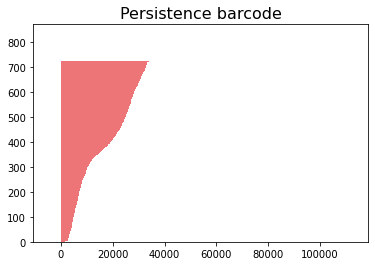

In [26]:
rips_complex = gudhi.RipsComplex(points=matrix)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
diag = simplex_tree.persistence()

gudhi.plot_persistence_barcode(diag)
plt.show()

In [27]:
persistence_module = simplex_tree.persistence()

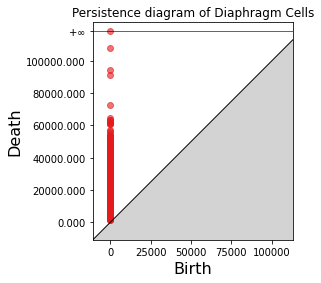

In [28]:
ax = gudhi.plot_persistence_diagram(persistence=persistence_module)
# We can modify the title, aspect, etc.
ax.set_title("Persistence diagram of Diaphragm Cells")
ax.set_aspect("equal")  # forces to be square shaped
plt.show()

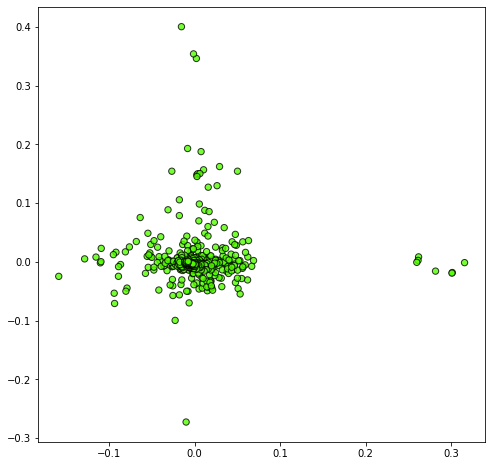

In [29]:
pogo = Pogo()
pogo.fit(mdist)
pogo.plot()

In [30]:
pogo.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [31]:
pogo.candidates_

[264045,
 232337,
 202702,
 321014,
 188413,
 194509,
 223378,
 155264,
 315220,
 228460,
 124052,
 169224,
 159184,
 220038,
 177035,
 199622,
 146514,
 110807,
 164389,
 17968,
 24057,
 166805,
 38142,
 100035,
 130585,
 12893,
 17213,
 115780,
 29928,
 69090,
 134057,
 105477,
 26237,
 162402,
 15743,
 16390,
 144610,
 181355,
 149388,
 14895,
 10929,
 22377,
 173285,
 183198,
 186686,
 28250,
 89133,
 27117,
 21805,
 25336,
 114317,
 121971,
 152037,
 218502,
 3778,
 127231,
 83871,
 13711,
 137754,
 4490,
 20401,
 22986,
 8048,
 117934,
 139101,
 29438,
 143368,
 42757,
 36217,
 12524,
 120915,
 19980,
 23654,
 29022,
 40606,
 67828,
 39345,
 119827,
 5159,
 88029,
 10446,
 5682,
 136646,
 32505,
 9313,
 175006,
 63359,
 25885,
 8675,
 35830,
 41760,
 19602,
 30980,
 129557,
 21119,
 91772,
 132651,
 103497,
 49707,
 101887,
 46653,
 104455,
 32920,
 31547,
 65399,
 142030,
 153523,
 95306,
 27761,
 12066,
 185695,
 141035,
 86050,
 7464,
 58005,
 8424,
 107301,
 70556,
 92856,
 1

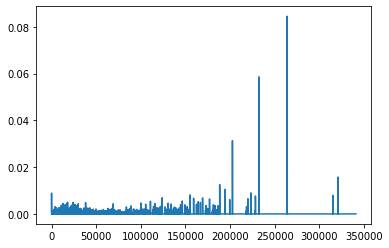

In [32]:
plt.plot(pogo.gap_vector_)

Maximum Silhouette: 232337


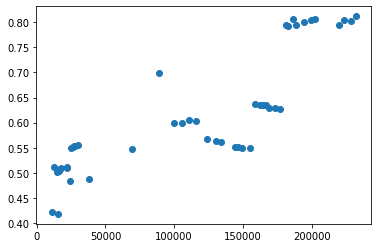

In [33]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 232337


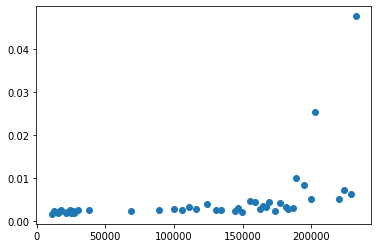

In [34]:
score_indices, score_array = pogo.plot_silhouette_score()

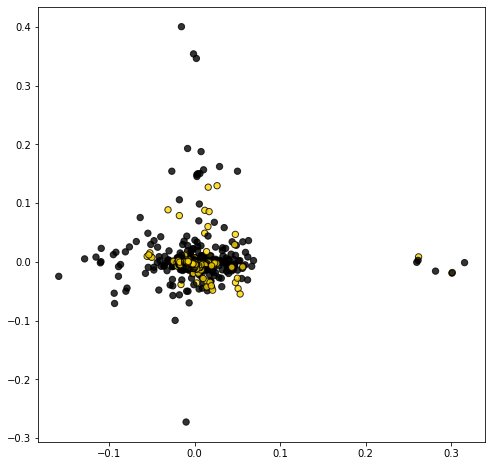

In [35]:
pogo.plot(15000)

Maximum Rand Score: 100035


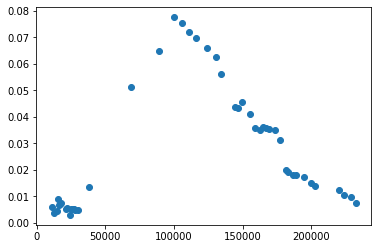

In [36]:
rand_indices, rand_array = pogo.plot_rand_score(y)
